In [21]:
import numpy as np
import pandas as pd
import os
from tabulate import tabulate
import matplotlib.pyplot as plt

# Q1

In [2]:
def load_data(file_name,index_col):
    current_directory = os.getcwd()
    parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
    file_path = os.path.join(parent_directory, file_name)
    dataset = pd.read_csv(file_path,index_col=index_col)
    return dataset

In [3]:
dataset = load_data('synthetic_software_defect.csv', index_col='id')

In [4]:
dataset

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False


# Q2

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loc                101763 non-null  float64
 1   v(g)               101763 non-null  float64
 2   ev(g)              101763 non-null  float64
 3   iv(g)              101763 non-null  float64
 4   n                  101763 non-null  float64
 5   v                  101763 non-null  float64
 6   l                  101763 non-null  float64
 7   d                  101763 non-null  float64
 8   i                  101763 non-null  float64
 9   e                  101763 non-null  float64
 10  b                  101763 non-null  float64
 11  t                  101763 non-null  float64
 12  lOCode             101763 non-null  int64  
 13  lOComment          101763 non-null  int64  
 14  lOBlank            101763 non-null  int64  
 15  locCodeAndComment  101763 non-null  int64  
 16  un

In [6]:
dataset.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


# Q3

In [7]:
def correlation(datatset, target_col,num_most):
    correlation_data = []
    for col_name in dataset.columns:
        if col_name == target_col:
            continue
        correlation = dataset[target_col].corr(dataset[col_name])
        if correlation < 0:
            correlation_type = "negatively correlated"
        elif correlation > 0:
            correlation_type = "positively correlated"
        else:
            correlation_type = "not correlated"
            
        correlation_data.append([col_name, correlation, correlation_type])
        
    print(tabulate(correlation_data, headers=["Variable", "Correlation", "Correlation Type"], tablefmt="grid"))
    correlation_data = sorted(correlation_data, key=lambda x: abs(x[1]),reverse=True)
    print('--------------------------------')
    for most_corr in correlation_data[:num_most]:  
        print(f"{most_corr[0]} has the highest correlation with {target_col}.")
        print(f"correlation value is: {most_corr[1]}")
        print("--")
        
    return correlation_data


In [8]:
correlation_data = correlation(dataset,"defects",2)

+-------------------+---------------+-----------------------+
| Variable          |   Correlation | Correlation Type      |
+===================+===============+=======================+
| loc               |     0.342642  | positively correlated |
+-------------------+---------------+-----------------------+
| v(g)              |     0.301187  | positively correlated |
+-------------------+---------------+-----------------------+
| ev(g)             |     0.259928  | positively correlated |
+-------------------+---------------+-----------------------+
| iv(g)             |     0.245618  | positively correlated |
+-------------------+---------------+-----------------------+
| n                 |     0.25808   | positively correlated |
+-------------------+---------------+-----------------------+
| v                 |     0.231179  | positively correlated |
+-------------------+---------------+-----------------------+
| l                 |    -0.253237  | negatively correlated |
+-------

# Q4

In [9]:
features = [item[0] for item in correlation_data]
dataset = dataset[[features[0], features[1], 'defects']]

In [19]:
dataset

,loc,branchCount,defects
id,,,
0,22.0,5.0,False
1,14.0,3.0,False
2,11.0,3.0,False
3,8.0,1.0,True
5,23.0,7.0,False
...,...,...,...
101658,336.0,72.0,True
101687,176.0,25.0,True
101708,148.0,39.0,True


# Q5

In [11]:
first_shape = dataset.shape[0]

In [12]:
dataset = dataset.drop_duplicates()

In [13]:
second_shape = dataset.shape[0]

In [17]:
percent_dup = ((first_shape - second_shape) * 100) / first_shape

In [18]:
percent_dup

92.06194785924157

# Q6

What is histogram? 
Representation of the distribution of a dataset. 

+ Bins or intervals: The range of values is divided into intervals or bins. 
+ Bar Height: The frequency or count of data points that fall within the corresponding bin.

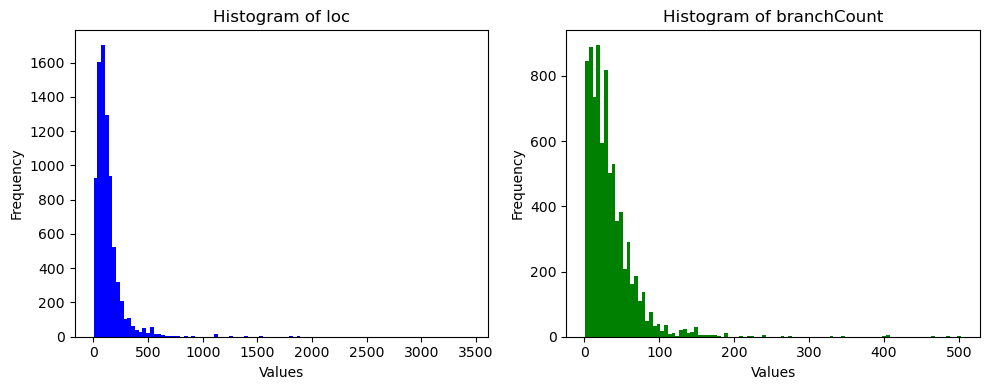

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
hist_loc, bins_loc, _ = plt.hist(dataset['loc'], bins=100, color='blue')
plt.title('Histogram of loc')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
hist_branchCount, bins_branchCount, _ = plt.hist(dataset['branchCount'], bins=100, color='green')
plt.title('Histogram of branchCount')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Q7

To identify the distribution of a feature, you can follow these steps:

    Visual Inspection: Start by plotting a histogram of the feature as previously discussed.

    Common distributions you may encounter include:
        1. Normal Distribution (Gaussian): A symmetric, bell-shaped curve.
        2. Exponential Distribution: A right-skewed distribution with a long tail.
        3. Uniform Distribution: All values are equally likely.
        4. Log-Normal Distribution: The natural logarithm of the data follows a normal distribution.
        5. Poisson Distribution: A discrete distribution for counting events over a fixed interval.

Our data is Log_Normal distuributed